In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

## Regressão Polinomial

In [57]:
## definindo a função para ajudar na avaliação dos modelos

def val_model(y_true,y_pred):
    print('x-x-x PRINTING METRICS FOR THE MODEL x-x-x')
    print('--'*30)
    print(f'MEAN SQUARED ERROR      : {mean_squared_error(y_true,y_pred)}')
    print(f'ROOT MEAN SQUARED ERROR : {np.sqrt(mean_squared_error(y_true,y_pred))}')

Não usaremos r2 como métrica para definição e escolha de modelos não lineares. Devido as conclusões encontradas por Spiess e Neumeyer.

https://www.researchgate.net/publication/44655045_An_evaluation_of_R2_as_an_inadequate_measure_for_nonlinear_models_in_pharmacological_and_biochemical_research_A_Monte_Carlo_approach

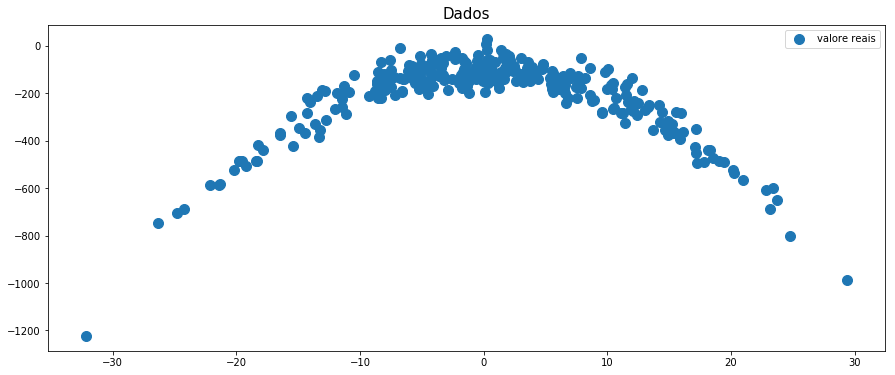

In [95]:
## criando o plotando os dados que vamos utilizar
x=10*np.random.normal(0,1,300)
y=(-x**2)+np.random.normal(-100,50,300)
plt.figure(figsize=(15,6))
plt.scatter(x=x,y=y,s=100,label='valore reais')
plt.title('Dados',size=15)
plt.legend()
plt.show()

Na situação acima é impossível criar um modelo puramente linear que entregue um bom resultado.

In [102]:
## treinando um modelo linear
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)

LinearRegression()

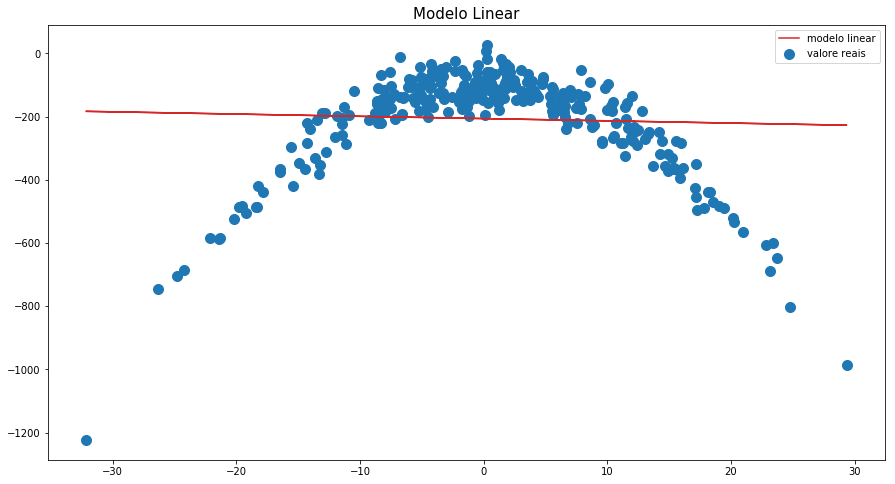

In [103]:
## plotando o modelo linear
plt.figure(figsize=(15,8))
plt.scatter(x=x,y=y,s=100,label='valore reais')
plt.plot(x,lr.predict(x.reshape(-1,1)),label='modelo linear',color = 'tab:red')
plt.title('Modelo Linear',size=15)
plt.legend()
plt.show()

In [104]:
## avaliando o modelo

y_pred = lr.predict(x.reshape(-1,1))

val_model(y,y_pred)

x-x-x PRINTING METRICS FOR THE MODEL x-x-x
------------------------------------------------------------
MEAN SQUARED ERROR      : 27208.1769022277
ROOT MEAN SQUARED ERROR : 164.94901303805275


Analisando o gráfico e as métricas podem enxergar que o modelo não descreve bem a relação entre X e Y. Existe um efeito de underfitting e por isso devemos aumentar a complexidade do nosso modelo utilizando polynomial features.

In [116]:
## criando as features polinominais
pol_transformer = PolynomialFeatures(degree=12)
x_poly = pol_transformer.fit_transform(x.reshape(-1,1))

In [117]:
## verificando as feature polinomais

x_poly[:10]

array([[ 1.00000000e+00,  1.21323396e+01,  1.47193665e+02,
         1.78580353e+03,  2.16659749e+04,  2.62858966e+05,
         3.18909425e+06,  3.86911745e+07,  4.69414469e+08,
         5.69509576e+09,  6.90948359e+10,  8.38282015e+11,
         1.01703221e+13],
       [ 1.00000000e+00, -3.21515429e+01,  1.03372171e+03,
        -3.32357478e+04,  1.06858057e+06, -3.43565141e+07,
         1.10461493e+09, -3.55150744e+10,  1.14186444e+12,
        -3.67127034e+13,  1.18037006e+15, -3.79507185e+16,
         1.22017415e+18],
       [ 1.00000000e+00,  5.26192976e-01,  2.76879048e-01,
         1.45691811e-01,  7.66620075e-02,  4.03390099e-02,
         2.12261037e-02,  1.11690267e-02,  5.87706339e-03,
         3.09246948e-03,  1.62723572e-03,  8.56240007e-04,
         4.50547478e-04],
       [ 1.00000000e+00,  1.11075725e+01,  1.23378166e+02,
         1.37043192e+03,  1.52221719e+04,  1.69081377e+05,
         1.87808365e+06,  2.08609502e+07,  2.31714516e+08,
         2.57378578e+09,  2.85885121e

In [118]:
## treinando um modelo com features polinomiais

lr_poly = LinearRegression()
lr_poly.fit(x_poly,y)

LinearRegression()

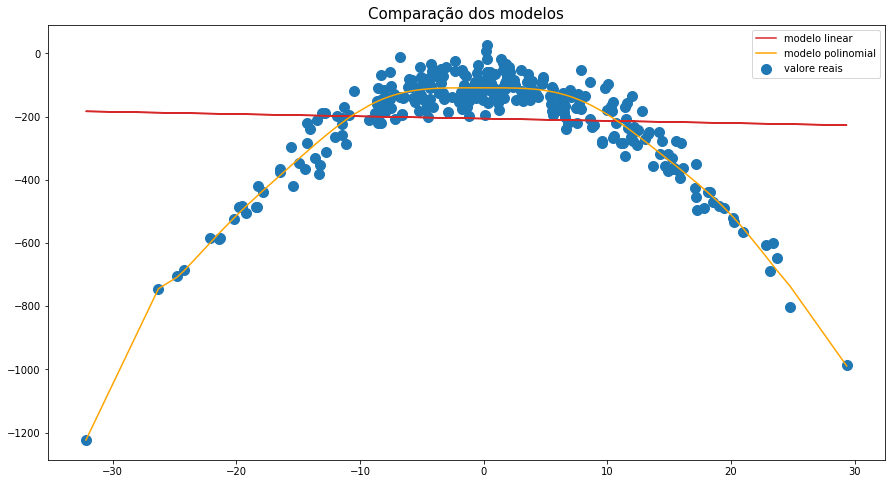

In [119]:
## plotando tudo junto
plt.figure(figsize=(15,8))
plt.scatter(x=x,y=y,s=100,label='valore reais')
plt.plot(x,lr.predict(x.reshape(-1,1)),label='modelo linear',color = 'tab:red')

##definindo polypred
poly_pred = lr_poly.predict(x_poly)
sorted_zip = sorted(zip(x,poly_pred))
x_poly_graph, poly_pred = zip(*sorted_zip)

## plotando o modelo polinomial
plt.plot(x_poly_graph,poly_pred,label='modelo polinomial',color = 'orange')
plt.title('Comparação dos modelos',size=15)
plt.legend()
plt.show()

In [120]:
## avaliando o modelo polinomial

y_pred = lr_poly.predict(x_poly)

val_model(y,y_pred)

x-x-x PRINTING METRICS FOR THE MODEL x-x-x
------------------------------------------------------------
MEAN SQUARED ERROR      : 2128.8457200327975
ROOT MEAN SQUARED ERROR : 46.13941612149852


## Pipelines

Vamos entender pipelines.

In [134]:
from sklearn import set_config
set_config(display='diagram')

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

Um pipeline é um objeto que pode receber estimadores e transformadores. Ele funciona como uma esteira de fábrica. Onde colocamos as máquinas ao longo da esteira, os dados são colocados e um lado da esteira e são transformados e enviados para um modelo que sai treinado ao final.

In [135]:
## criando valores nulos nos dados

idxs_null = np.random.choice(list(range(20,x.shape[0])),size=int(x.shape[0]*0.15))

for idx_null in idxs_null:
    x[idx_null] = np.nan

In [136]:
## verificando a quantidade de valores nulos no dataset

pd.DataFrame(x).isna().sum()

0    113
dtype: int64

In [137]:
## criando um pipeline com imputação, transformação e modelo

pipe = make_pipeline(SimpleImputer(strategy='median'),
                     PolynomialFeatures(degree=3),
                     LinearRegression())

In [138]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [47]:
pipe.fit(x.reshape(-1,1),y)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

## Voltando para o exemplo

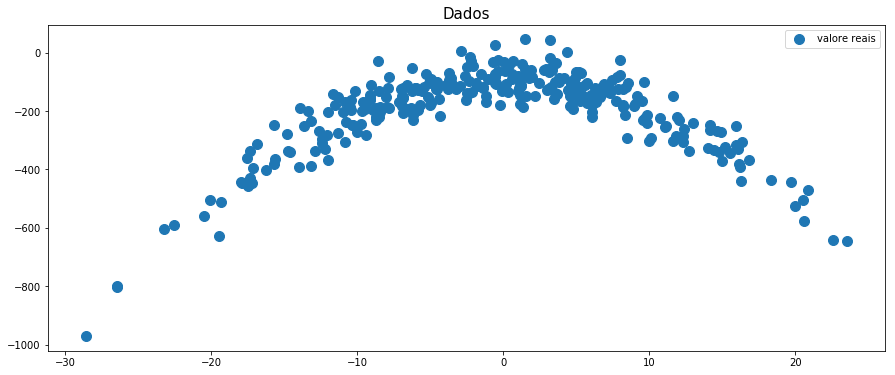

In [143]:
## criando o plotando os dados que vamos utilizar
x=10*np.random.normal(0,1,300)
y=(-x**2)+np.random.normal(-100,50,300)
plt.figure(figsize=(15,6))
plt.scatter(x=x,y=y,s=100,label='valore reais')
plt.title('Dados',size=15)
plt.legend()
plt.show()

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=24)),
                ('linearregression', LinearRegression())])

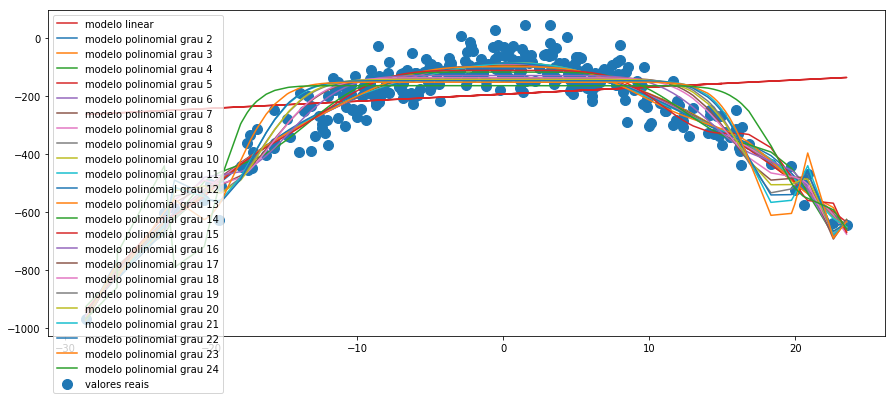

In [153]:
## treinando os pipes e modelos
plt.figure(figsize=(15,6))
plt.scatter(x=x,y=y,s=100,label='valores reais')

## MODELO LINEAR
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)
plt.plot(x,lr.predict(x.reshape(-1,1)),label='modelo linear',color = 'tab:red')

## MODELOS POLINOMIAIS

val_score = {}

for i in range(2,25):
    
    pipe = make_pipeline(PolynomialFeatures(degree=i),LinearRegression())
    pipe.fit(x.reshape(-1,1),y)
    
    y_pred = pipe.predict(x.reshape(-1,1))
    
    sorted_zip = sorted(zip(x,y_pred))
    x_poly_graph, y_pred = zip(*sorted_zip)
    
    plt.plot(x_poly_graph,y_pred,label=f'modelo polinomial grau {i}')
    
    val_score[i] = np.sqrt(mean_squared_error(y,y_pred))
    

plt.legend()
pipe

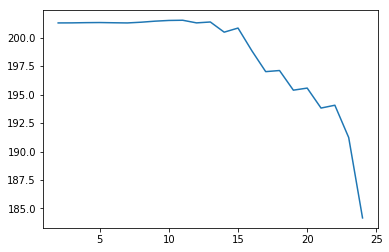

In [155]:
plt.plot(range(2,25),list(val_score.values()))

## Exemplo aula passada

In [173]:
data = fetch_california_housing()

df = (
    pd.DataFrame(data['data'],columns=data['feature_names'])
    .assign(target = data['target'])
)

df.head()

## splitando o dataset

x = df.drop(['target','Latitude','Longitude'],axis=1)
y = df.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(15480, 6) (15480,)
(5160, 6) (5160,)


Vamos ver se nosso modelo da aula passada pode melhorar.

In [174]:
## treinando a avaliando o resultado com modelo linear

lr = LinearRegression()
lr.fit(x_train,y_train)

val_model(y_test,lr.predict(x_test))

x-x-x PRINTING METRICS FOR THE MODEL x-x-x
------------------------------------------------------------
MEAN SQUARED ERROR      : 0.6287121228743695
ROOT MEAN SQUARED ERROR : 0.7929136919453273


In [179]:
## criando e treinando um pipeline com PolynomialFeatures 2 e LinearRegression

pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())
pipe.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [180]:
## gerando previsoes e avaliando o modelo

y_pred_pipe = pipe.predict(x_test)
val_model(y_test,y_pred_pipe)

x-x-x PRINTING METRICS FOR THE MODEL x-x-x
------------------------------------------------------------
MEAN SQUARED ERROR      : 0.5463203955403083
ROOT MEAN SQUARED ERROR : 0.7391348967139275


In [182]:
pipe.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures()),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression(),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': False}

## Avaliando under e overfitting

In [183]:
train_error = []
test_error = []

for i in range(2,7):
    pipe.set_params(polynomialfeatures__degree=i)
    pipe.fit(x_train,y_train)
    
    train_error.append(np.sqrt(mean_squared_error(y_train,pipe.predict(x_train))))
    test_error.append(np.sqrt(mean_squared_error(y_test,pipe.predict(x_test))))

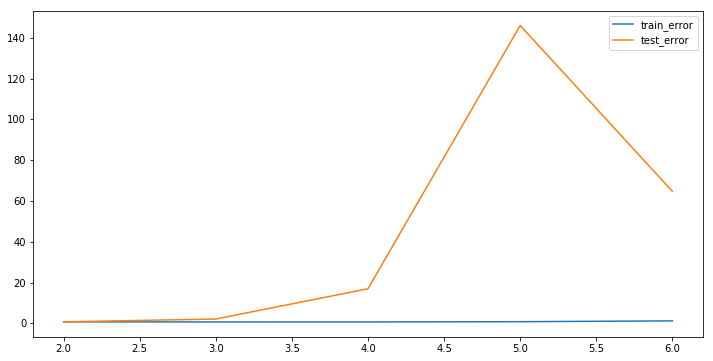

In [184]:
plt.figure(figsize=(12,6))

plt.plot(range(2,7),train_error,label='train_error')
plt.plot(range(2,7),test_error,label='test_error')

plt.legend()